**HAND WRITTEN DIGIT PREDICTION**

**Import Library**

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt


**Step 2: Import Data**

In [5]:
from sklearn.datasets import load_digits

In [6]:
df= load_digits()

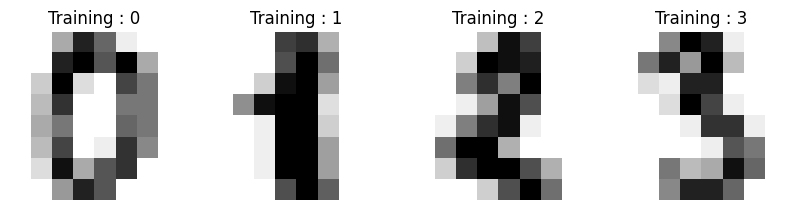

In [7]:
_, axes =plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training : %i" % label)

**Step 3:Data Preprocessing**


In [8]:
df.images.shape

(1797, 8, 8)

In [9]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [10]:
df.images[0].shape

(8, 8)

In [11]:
len(df.images)

1797

In [12]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [13]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [14]:
data[0].shape

(64,)

In [15]:
data.shape

(1797, 64)

**Scaling Image Data **



In [16]:
data.min()

0.0

In [17]:
data.max()

16.0

In [20]:
data = data/16

In [21]:
data.min()

0.0

In [22]:
data.max()

0.0625

In [23]:
data[0]

array([0.        , 0.        , 0.01953125, 0.05078125, 0.03515625,
       0.00390625, 0.        , 0.        , 0.        , 0.        ,
       0.05078125, 0.05859375, 0.0390625 , 0.05859375, 0.01953125,
       0.        , 0.        , 0.01171875, 0.05859375, 0.0078125 ,
       0.        , 0.04296875, 0.03125   , 0.        , 0.        ,
       0.015625  , 0.046875  , 0.        , 0.        , 0.03125   ,
       0.03125   , 0.        , 0.        , 0.01953125, 0.03125   ,
       0.        , 0.        , 0.03515625, 0.03125   , 0.        ,
       0.        , 0.015625  , 0.04296875, 0.        , 0.00390625,
       0.046875  , 0.02734375, 0.        , 0.        , 0.0078125 ,
       0.0546875 , 0.01953125, 0.0390625 , 0.046875  , 0.        ,
       0.        , 0.        , 0.        , 0.0234375 , 0.05078125,
       0.0390625 , 0.        , 0.        , 0.        ])

**Train Test Split Data**

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test= train_test_split(data,df.target,test_size=0.3)

In [26]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

**Random forest Model**

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf = RandomForestClassifier()

In [29]:
rf.fit(X_train,y_train)

RandomForestClassifier()

**Predict Test Data**

In [30]:
y_pred = rf.predict(X_test)

In [31]:
y_pred

array([8, 7, 8, 6, 9, 8, 7, 0, 4, 9, 0, 1, 4, 2, 0, 8, 8, 2, 4, 5, 8, 9,
       0, 6, 2, 0, 7, 4, 6, 1, 2, 7, 1, 5, 9, 3, 1, 8, 9, 2, 7, 0, 9, 6,
       0, 8, 5, 5, 6, 8, 5, 8, 4, 2, 4, 9, 5, 8, 2, 5, 8, 0, 7, 8, 7, 0,
       5, 4, 0, 4, 0, 8, 6, 3, 3, 6, 1, 9, 3, 1, 4, 6, 3, 5, 5, 0, 6, 0,
       0, 6, 5, 0, 4, 3, 2, 8, 0, 0, 0, 1, 5, 9, 5, 5, 2, 6, 8, 4, 0, 9,
       1, 6, 7, 7, 4, 2, 7, 9, 8, 6, 2, 4, 2, 1, 7, 9, 1, 0, 6, 5, 4, 4,
       4, 9, 6, 1, 2, 3, 3, 9, 4, 2, 8, 7, 0, 2, 8, 6, 8, 1, 5, 9, 3, 2,
       9, 9, 2, 3, 3, 6, 2, 8, 9, 9, 5, 6, 8, 8, 1, 7, 9, 0, 9, 2, 4, 6,
       4, 8, 1, 3, 9, 3, 7, 2, 9, 2, 0, 4, 2, 1, 7, 2, 3, 5, 7, 7, 1, 4,
       1, 3, 2, 1, 5, 7, 1, 9, 3, 1, 8, 6, 9, 1, 3, 5, 3, 3, 6, 9, 7, 0,
       8, 8, 6, 4, 8, 4, 2, 7, 3, 0, 0, 5, 5, 2, 5, 9, 6, 8, 5, 1, 7, 4,
       7, 3, 5, 6, 0, 0, 5, 1, 2, 5, 7, 1, 0, 8, 2, 6, 0, 7, 5, 0, 2, 3,
       1, 3, 8, 9, 5, 9, 7, 4, 7, 6, 1, 6, 0, 9, 2, 8, 3, 9, 5, 4, 0, 0,
       8, 5, 3, 1, 6, 9, 5, 5, 1, 2, 8, 1, 5, 1, 1,

**Model Accuracy**

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

In [33]:
confusion_matrix(y_test, y_pred)

array([[57,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 56,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 50,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 48,  0,  1,  0,  1,  0,  1],
       [ 0,  0,  0,  0, 51,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 63,  1,  0,  0,  1],
       [ 1,  0,  1,  0,  0,  1, 56,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 46,  0,  0],
       [ 1,  3,  0,  1,  0,  0,  0,  0, 53,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  3,  0, 41]])

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        58
           1       0.95      1.00      0.97        56
           2       0.98      0.98      0.98        51
           3       0.94      0.94      0.94        51
           4       0.98      1.00      0.99        51
           5       0.97      0.97      0.97        65
           6       0.98      0.95      0.97        59
           7       0.92      1.00      0.96        46
           8       1.00      0.91      0.95        58
           9       0.95      0.91      0.93        45

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.97      0.96      0.96       540

